# HW3_Q5&Q6 Method

In [54]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np

In [55]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


the code of insertion sort algorithm 

In [56]:
def Insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

Code of Merge sort. 

In [60]:
def Merge_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        mid = len(arr)//2
        left = Merge_sort(arr[:mid])
        right = Merge_sort(arr[mid:])
        return Merge(left,right)

def Merge(left, right):
    merged = []
    i = j = 0
    while i< len(left) and j<len(right):
        if left[i] <= right[i]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1 
    #Add the remaining elements to the list (the while loop will stop when left or right are empty). 
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

Q6: Code of Hybrid Sort

In [110]:
def Hybrid_sort(arr, k):
    #using insertions sort when the lens of array not larger than k. 
    if len(arr) <= k:
        return Insertion_sort(arr) 
    #using merge sort when lens of array larger than k. 
    mid = len(arr)//2
    left = Hybrid_sort(arr[:mid],k)
    right = Hybrid_sort(arr[mid:],k)
    return Merge(left,right)

Code of calculate the time of hybrid functions and the different running time when k has different values. 

In [122]:
#sort_algorithm means the function chosen 
def time_sort(Sort_Algorithm, arr, recTime, **k):
    TotalTime= 0.0
    for _ in range(recTime):
        #sort the copy of the original array to avoid modifying the original array. 
        CopyArr = list(arr)  
        start_time = timeit.default_timer()
        Sort_Algorithm(CopyArr,**k) if k else Sort_Algorithm(CopyArr)
        runningTime = timeit.default_timer() - start_time
        #calculate the total time used for the algorithm. 
        TotalTime += runningTime
    return TotalTime

In [149]:
n = 1000 #It is noticable that because the size of array been divided is previous array divided by two.
#So the running time will change in stages rather than linearly
num_Random_Generate = 5

# the scale of value of k
k_values = list(range(1, 400,2))
hybrid_times = []

for k in k_values:
    #t is used to represents the running time of all k. 
    t = 0.0
    j = 0
    for j in range(num_Random_Generate):
        base_array = [random.randint(0, 10000) for _ in range(n)]
        t += time_sort(Hybrid_sort, base_array, 3, k=k)
        j += 1
    hybrid_times.append(t/num_Random_Generate)

Draw the figure of the running time of hybrid sort influenced by the value of k.

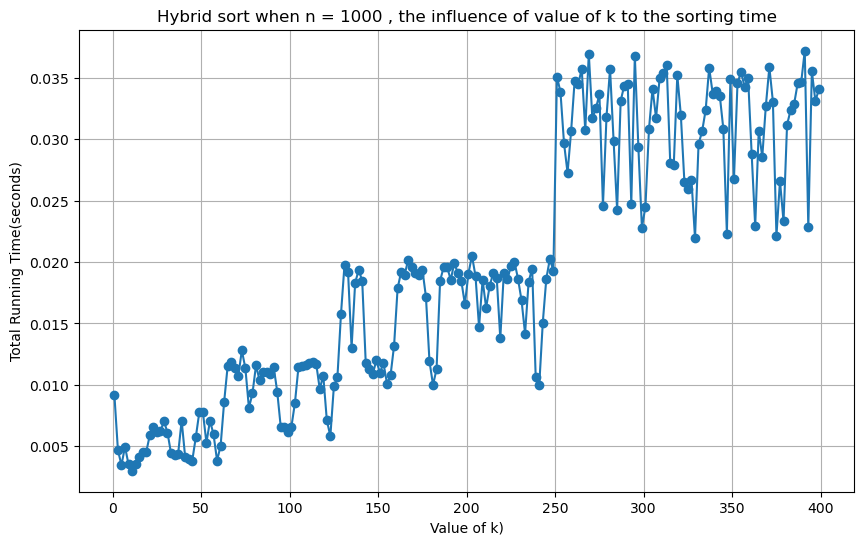

When n = 1000，best k = 11，average running time is 0.003007 seconds


In [152]:
# Draw the relationship between k and running time. 
plt.figure(figsize=(10, 6))
plt.plot(k_values, hybrid_times, marker='o')
plt.xlabel("Value of k)")
plt.ylabel("Total Running Time(seconds)")
plt.title("Hybrid sort when n = {} , the influence of value of k to the sorting time".format(n))
plt.grid(True)
plt.show()

# Find the value of k when running time is minimized 
min_time = min(hybrid_times)
optimal_k = k_values[hybrid_times.index(min_time)]
print("When n = {}，best k = {}，average running time is {:.6f} seconds".format(n, optimal_k, min_time))

Conduct the compare experiment between three algorithms. 

In [168]:
#n_Values contains different arrays. Each array will be used in one test turn, which n numbers of elements each. 
n_Values = list(range(30, 60, 1))
insertionTimes = []
mergeTimes = []
hybridTimes = []
for n in n_Values:
    #randomly generate every elements in the "arr"
    #num_runs means the time of repeat of sort algorithm.
    # As the running time of insertion sort will be significantly influenced by the 
    num_runs = 10
    t_insertion = 0.0
    t_merge = 0.0
    t_hybrid = 0.0
    for runtime in range(num_runs):
        arr = [random.randint(0, 10000) for _ in range(n)]
        # Do the test and calculate the total time of insertion sorts. 
        t_insertion += time_sort(Insertion_sort, arr,5)
        # Do the test and calculate the total time of merge sort. 
        t_merge += time_sort(lambda a: Merge_sort(a), arr,5)
        t_hybrid += time_sort(Hybrid_sort, arr,5,k=44)
        runtime +=1
    insertionTimes.append(t_insertion/num_runs)
    mergeTimes.append(t_merge/num_runs)
    hybridTimes.append(t_hybrid/num_runs)

    #insertionTimes.append(t_insertion)
    #mergeTimes.append(t_merge)

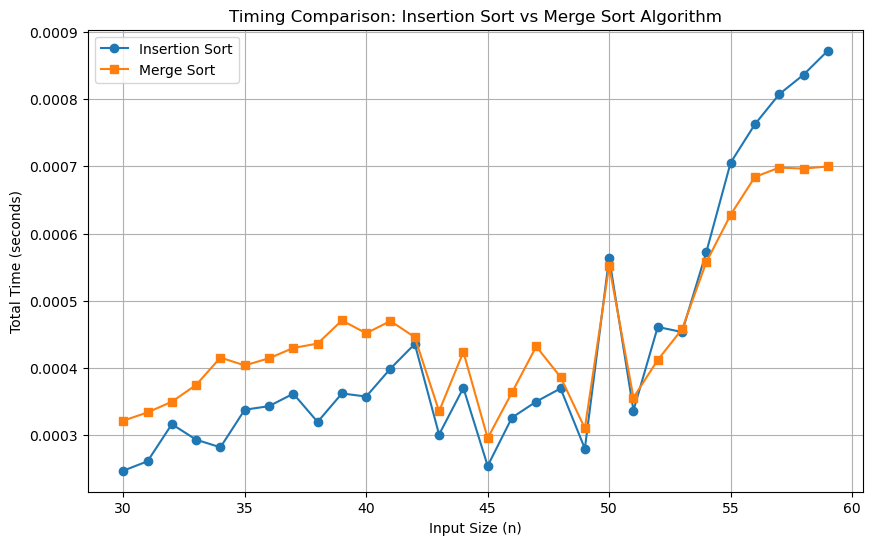

In [169]:
#Draw the image of the result:
plt.figure(figsize=(10, 6))
plt.plot(n_Values, insertionTimes, marker='o', label='Insertion Sort')
plt.plot(n_Values, mergeTimes, marker='s', label='Merge Sort')
plt.xlabel('Input Size (n)')
plt.ylabel('Total Time (seconds)')
plt.title('Timing Comparison: Insertion Sort vs Merge Sort Algorithm')
plt.legend()
plt.grid(True)
plt.show()

# HW3_Q6 Hybrid sorting

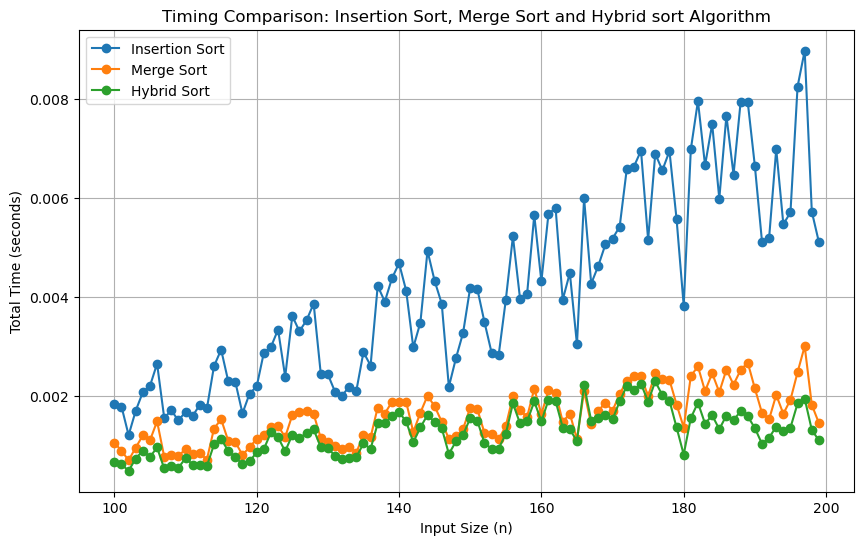

In [155]:
#Draw the image of the result:
plt.figure(figsize=(10, 6))
plt.plot(n_Values, insertionTimes, marker='o', label='Insertion Sort')
plt.plot(n_Values, mergeTimes, marker='o', label='Merge Sort')
plt.plot(n_Values, hybridTimes, marker='o', label='Hybrid Sort')
plt.xlabel('Input Size (n)')
plt.ylabel('Total Time (seconds)')
plt.title('Timing Comparison: Insertion Sort, Merge Sort and Hybrid sort Algorithm')
plt.legend()
plt.grid(True)
plt.show()